<a href="https://colab.research.google.com/github/Parth-nXp/DNN_mini_project/blob/main/dnn_stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
! pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset")

Skipping, found downloaded files in "./stroke-prediction-dataset" (use force=True to force download)


In [77]:
! pip install torchinfo --quiet

In [91]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchinfo import summary
from torch.optim import Adam


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [79]:
data_df = pd.read_csv("/content/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
data_df['bmi'].fillna(data_df['bmi'].mean(), inplace = True)
data_df.head()

/tmp/ipython-input-2760078246.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df['bmi'].fillna(data_df['bmi'].mean(), inplace = True)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [80]:
data_df.dropna(inplace = True)
data_df.drop(['id'], axis = 1, inplace = True)
data_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [81]:
print(data_df['gender'].unique())
print(data_df['hypertension'].unique())
print(data_df['heart_disease'].unique())
print(data_df['ever_married'].unique())
print(data_df['work_type'].unique())
print(data_df['Residence_type'].unique())
print(data_df['smoking_status'].unique())
print(data_df['stroke'].unique())

['Male' 'Female' 'Other']
[0 1]
[1 0]
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
[1 0]


In [82]:
data_df['ever_married'] = data_df['ever_married'].map({'Yes': 1, 'No': 0})
data_df['Residence_type'] = data_df['Residence_type'].map({'Urban': 1, 'Rural': 0})

data_df = pd.get_dummies(data_df, columns = ['gender', 'work_type', 'smoking_status'])
data_df.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,1,228.69,36.600000,1,False,True,False,False,False,True,False,False,False,True,False,False
1,61.0,0,0,1,0,202.21,28.893237,1,True,False,False,False,False,False,True,False,False,False,True,False
2,80.0,0,1,1,0,105.92,32.500000,1,False,True,False,False,False,True,False,False,False,False,True,False
3,49.0,0,0,1,1,171.23,34.400000,1,True,False,False,False,False,True,False,False,False,False,False,True
4,79.0,1,0,1,0,174.12,24.000000,1,True,False,False,False,False,False,True,False,False,False,True,False


In [83]:
data_df = data_df.astype(float)
data_df.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,1.0,1.0,228.69,36.600000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,61.0,0.0,0.0,1.0,0.0,202.21,28.893237,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0.0,1.0,1.0,0.0,105.92,32.500000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0.0,0.0,1.0,1.0,171.23,34.400000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,79.0,1.0,0.0,1.0,0.0,174.12,24.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [84]:
X = np.array(data_df.iloc[:, :-1])
X_tensor = torch.tensor(X, dtype = torch.float32)
y = np.array(data_df.iloc[:, -1])
y_tensor = torch.tensor(y, dtype = torch.float32)
dataset = TensorDataset(X_tensor, y_tensor)
print(X.shape, y.shape)

(5110, 19) (5110,)


In [85]:
data_loader = DataLoader(dataset, batch_size = 32, shuffle = True)

In [86]:
class my_model(nn.Module):
  def __init__(self):
    super(my_model, self).__init__()
    self.linear1 = nn.Linear(19, 64)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(64, 32)
    self.linear3 = nn.Linear(32, 1)

  def forward(self,x):
    x = self.linear1(x)
    x = self.relu(x)
    x = self.linear2(x)
    x = self.relu(x)
    x = self.linear3(x)
    return x


model = my_model().to(device)

In [87]:
summary(model, input_size = (32, X.shape[1]))

Layer (type:depth-idx)                   Output Shape              Param #
my_model                                 [32, 1]                   --
├─Linear: 1-1                            [32, 64]                  1,280
├─ReLU: 1-2                              [32, 64]                  --
├─Linear: 1-3                            [32, 32]                  2,080
├─ReLU: 1-4                              [32, 32]                  --
├─Linear: 1-5                            [32, 1]                   33
Total params: 3,393
Trainable params: 3,393
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.11
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 0.01
Estimated Total Size (MB): 0.04

In [88]:
criterion = nn.BCEWithLogitsLoss()
optimizer = Adam(model.parameters(), lr= 0.001)

In [90]:
total_loss_plot = []

epochs = 30

for epoch in range(epochs):
  total_loss = 0
  model.train()
  for input, label in data_loader:
    input = input.to(device)
    label = label.to(device)

    prediction = model(input).squeeze(-1)

    batch_loss = criterion(prediction, label)
    optimizer.zero_grad()
    batch_loss.backward()
    optimizer.step()

    total_loss += batch_loss.item()

  total_loss_plot.append(total_loss / len(data_loader))
  print(f"Epoch: {epoch + 1}, Loss = {total_loss_plot[-1]}")
  print("="*30)

Epoch: 1, Loss = 0.4381330695003271
Epoch: 2, Loss = 0.41208125874400137
Epoch: 3, Loss = 0.3518802235834301
Epoch: 4, Loss = 0.20835359948687254
Epoch: 5, Loss = 0.06276640313444659
Epoch: 6, Loss = 0.01879797990550287
Epoch: 7, Loss = 0.008409100626158761
Epoch: 8, Loss = 0.004433607561077224
Epoch: 9, Loss = 0.002795274159143446
Epoch: 10, Loss = 0.0018435584534017835
Epoch: 11, Loss = 0.0013097894452585024
Epoch: 12, Loss = 0.0009244273165677442
Epoch: 13, Loss = 0.000605924326373497
Epoch: 14, Loss = 0.0004168323301655619
Epoch: 15, Loss = 0.00032819560801726765
Epoch: 16, Loss = 0.0002423267812901031
Epoch: 17, Loss = 0.00021017219780787854
Epoch: 18, Loss = 0.0001615985862827074
Epoch: 19, Loss = 0.00012909820479762858
Epoch: 20, Loss = 0.000110824824082556
Epoch: 21, Loss = 8.900766410988581e-05
Epoch: 22, Loss = 7.222654135148332e-05
Epoch: 23, Loss = 6.194462841904169e-05
Epoch: 24, Loss = 5.210385864984346e-05
Epoch: 25, Loss = 4.3025949059938286e-05
Epoch: 26, Loss = 3.9082

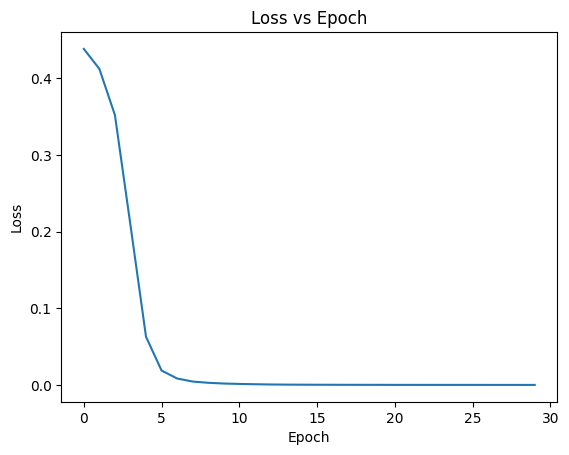

In [92]:
plt.plot(total_loss_plot)
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()